In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\kaggle dataset\Airline passengers satisfaction.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [14]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

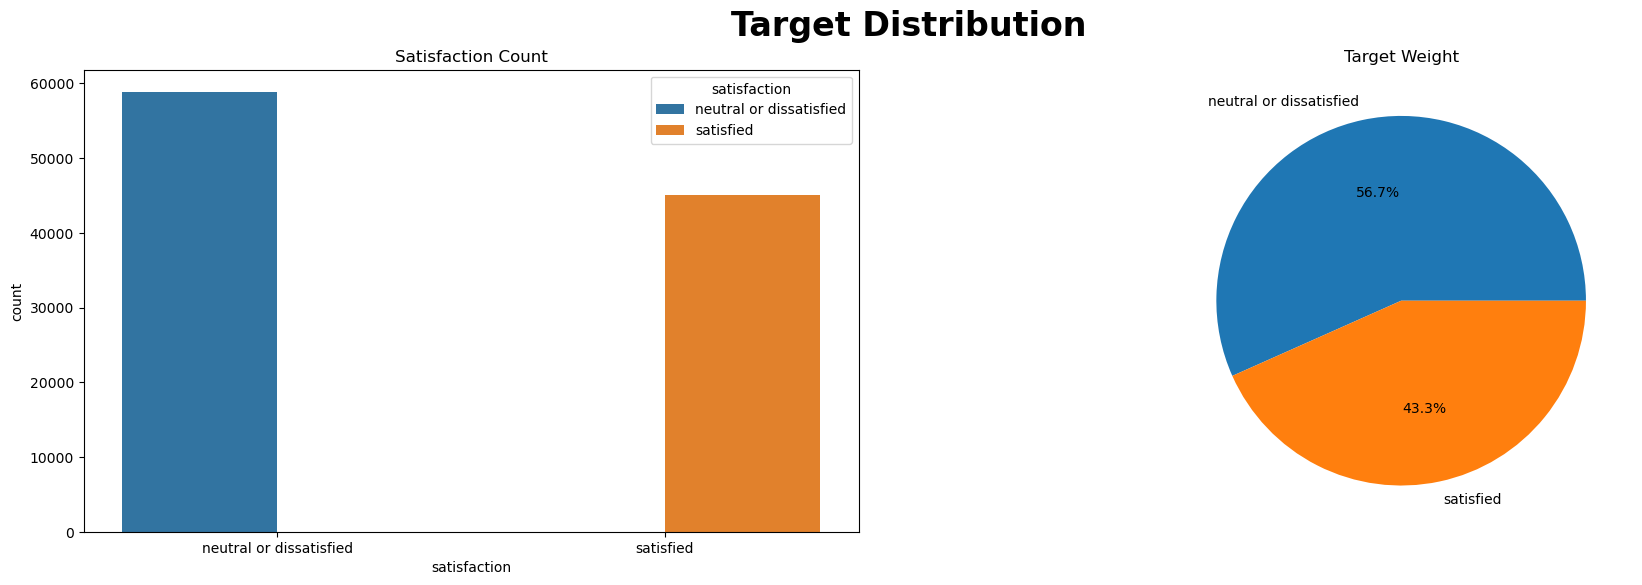

In [42]:
fig = plt.figure(figsize=(22, 6))
plt.suptitle('Target Distribution', weight='bold', fontsize=24)

grid = plt.GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Satisfaction Count')

sns.countplot(x='satisfaction', data=df, ax=ax1, hue='satisfaction')


#second subplot
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)
#pie chart
ax2.pie(value,labels=label,autopct='%1.1f%%')

plt.show()

In [ ]:
list(df['satisfaction'].value_counts().values)

(-1.0999986289177037,
 1.0999919885578529,
 -1.0999999892235734,
 1.0999999994868368)

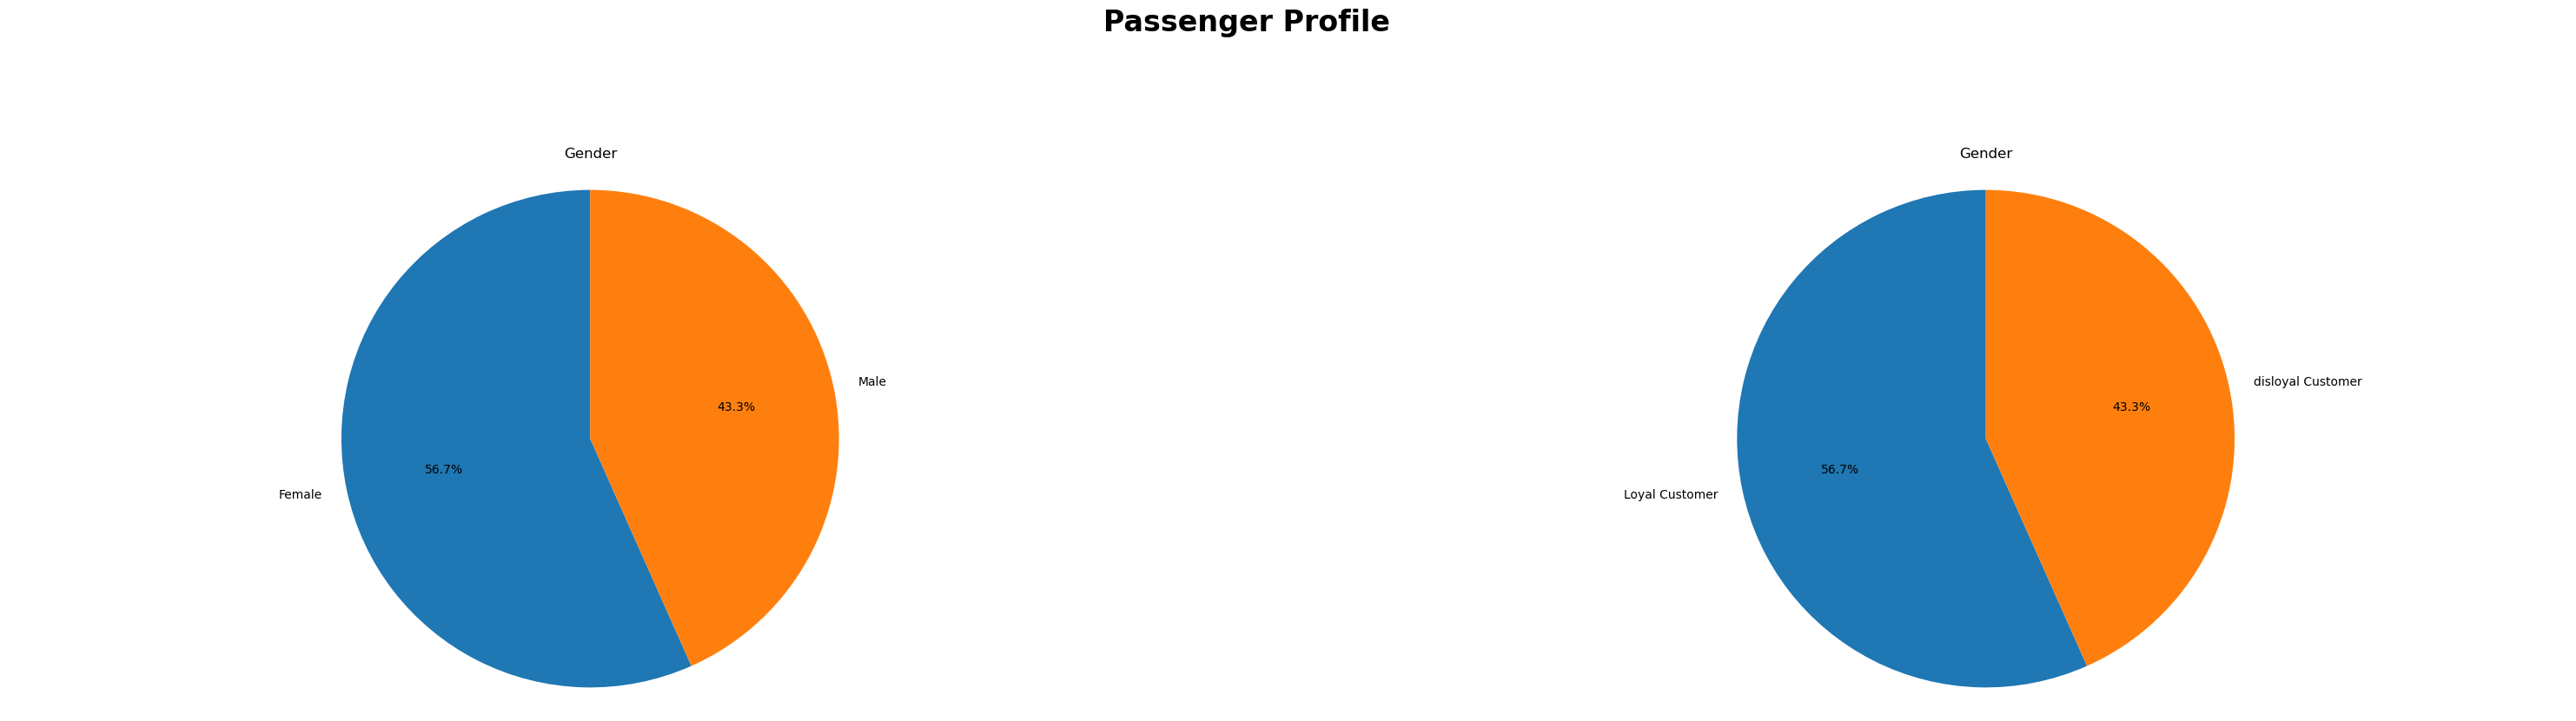

In [63]:
fig=plt. figure(figsize= (38,18)) 
plt.suptitle('Passenger Profile',weight="bold", fontsize= 24)
grid=gridspec.GridSpec(nrows= 2, ncols =2, figure= fig) 

ax1 =fig.add_subplot(grid[0,:1])
ax1.set_title("Gender")
               
label= list(df["Gender"].value_counts().index)
values = list(df["Gender"].value_counts().values)
              
ax1.pie(value,labels=label,autopct='%1.1f%%',startangle=90)
ax1.axis('equal')


ax2 =fig.add_subplot(grid[0,1:])
ax2.set_title("Gender")
               
label= list(df["Customer Type"].value_counts().index)
values = list(df["Customer Type"].value_counts().values)
              
ax2.pie(value,labels=label,autopct='%1.1f%%',startangle=90)
ax2.axis('equal')

 43.3% of passangers are males and 56.7% of passangers are female

In [61]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

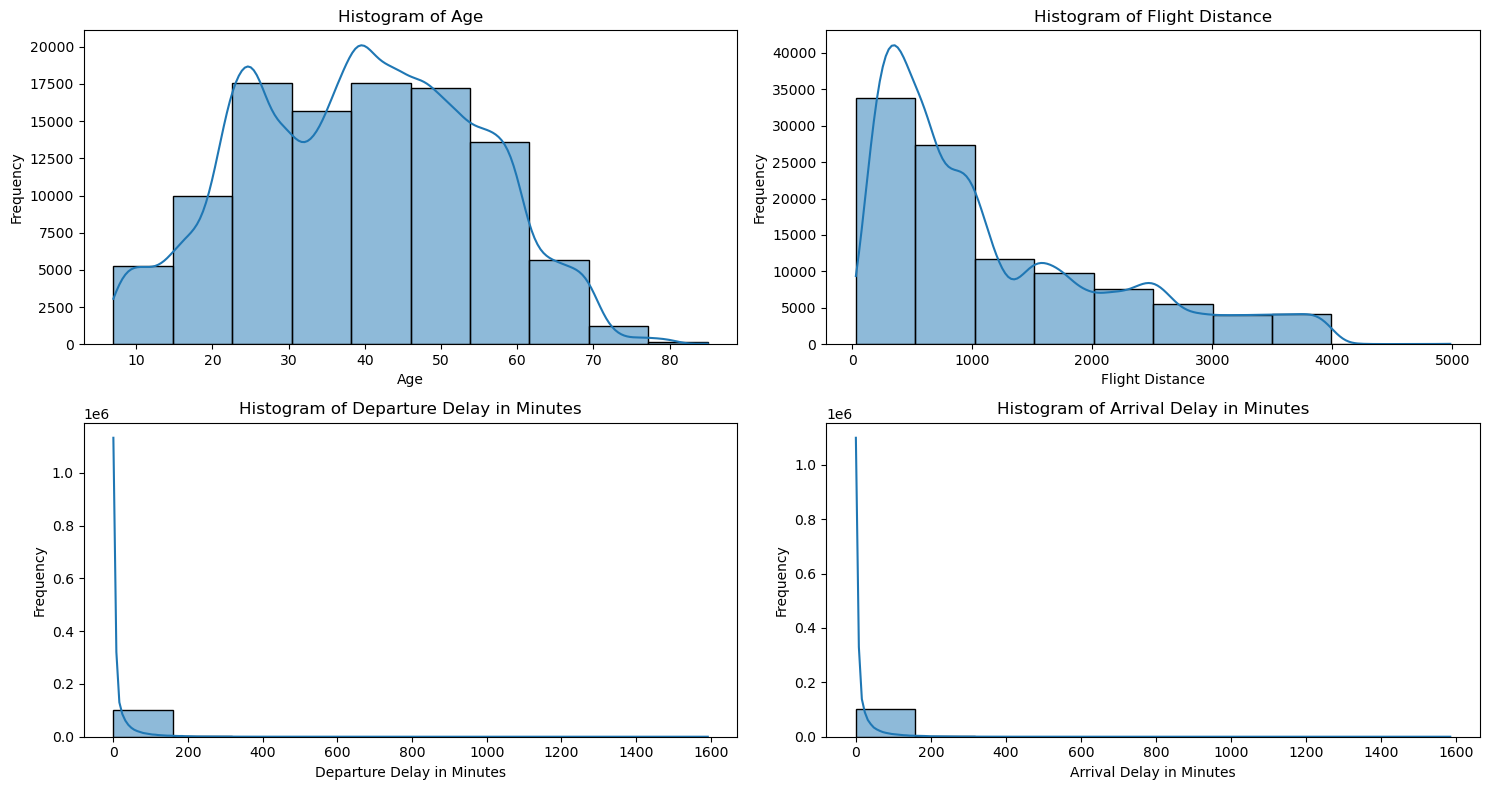

In [64]:
numerical_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
num_vars_per_row = 2

num_rows = (len(numerical_vars) + num_vars_per_row - 1) // num_vars_per_row

fig, axes = plt.subplots(num_rows, num_vars_per_row, figsize=(15, 4*num_rows))

for i, var in enumerate(numerical_vars):
    row = i // num_vars_per_row
    col = i % num_vars_per_row
    sns.histplot(df[var], bins=10, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- The distribution of 'Age' is are normal, with the majority of passengers falling between the ages of 30 and 50. and indicating that mostly people traveliing during their middle age.
- The distribution of 'Flight Distance' is right-skewed, indicating that the majority of flights are relatively short distances in between 30 - 1000. also indicaiting that majority of flights are short to medium distances, with only a few long-haul flights.

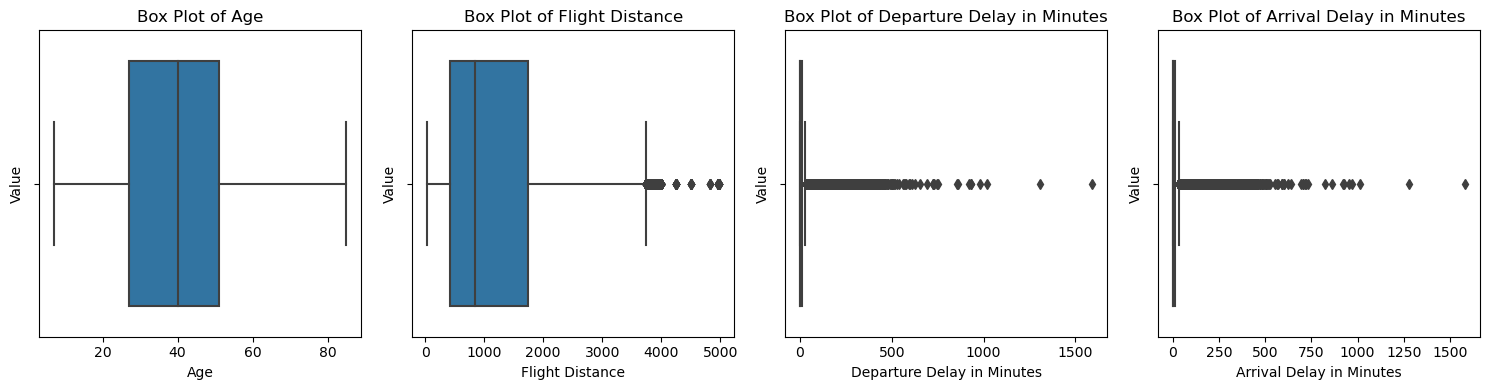

In [65]:
fig, axes = plt.subplots(1, len(numerical_vars), figsize=(15, 4))

for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df[var], ax=axes[i])  
    axes[i].set_title(f'Box Plot of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Value')  

plt.tight_layout() 
plt.show()

- The box plot for 'Age' shows that the majority of passengers fall within the age range of 30 to 50, So majority of customers are in middle age.
- The box plot for 'Flight Distance' indicates that most flights are short to medium distances around 300 to 1800, with a few longer flights being outliers.

In [67]:
categorical_vars = ['Gender','Customer Type','Type of Travel','Class','Inflight wifi service',
                    'Departure/Arrival time convenient','Ease of Online booking','Gate location',
                    'Food and drink','Online boarding','Seat comfort','Inflight entertainment',
                    'On-board service','Leg room service','Baggage handling','Checkin service',
                    'Inflight service','Cleanliness']

In [69]:
def plot_categorical_variables(categorical_vars, data):
    num_categorical_vars = len(categorical_vars)

    # Calculate the number of rows and columns for subplots
    num_rows = (num_categorical_vars + 1) // 2  # Add 1 to round up if odd number of variables
    num_cols = 2

    # Calculate figure size dynamically based on the number of rows
    fig_height = num_rows * 5  # Adjust as needed for the desired height per row
    fig_width = 15  # Fixed width

    # Create subplots with adjusted figure size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
   # Plotting bar charts for categorical variables
    for i, var in enumerate(categorical_vars):
        row = i // num_cols
        col = i % num_cols
        counts = data[var].value_counts()
        counts.plot(kind='bar', ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {var}', fontsize=14)
        axes[row, col].set_ylabel('Count', fontsize=12)
        axes[row, col].set_xlabel('', fontsize=12)  
        axes[row, col].tick_params(axis='x', labelrotation=0)
        axes[row, col].tick_params(axis='both', labelsize=12) 
        for index, value in enumerate(counts):
            axes[row, col].text(index, value + 10, str(value), ha='center', va='bottom', fontsize=11)  

    # Hide empty subplots if any
    if num_categorical_vars % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

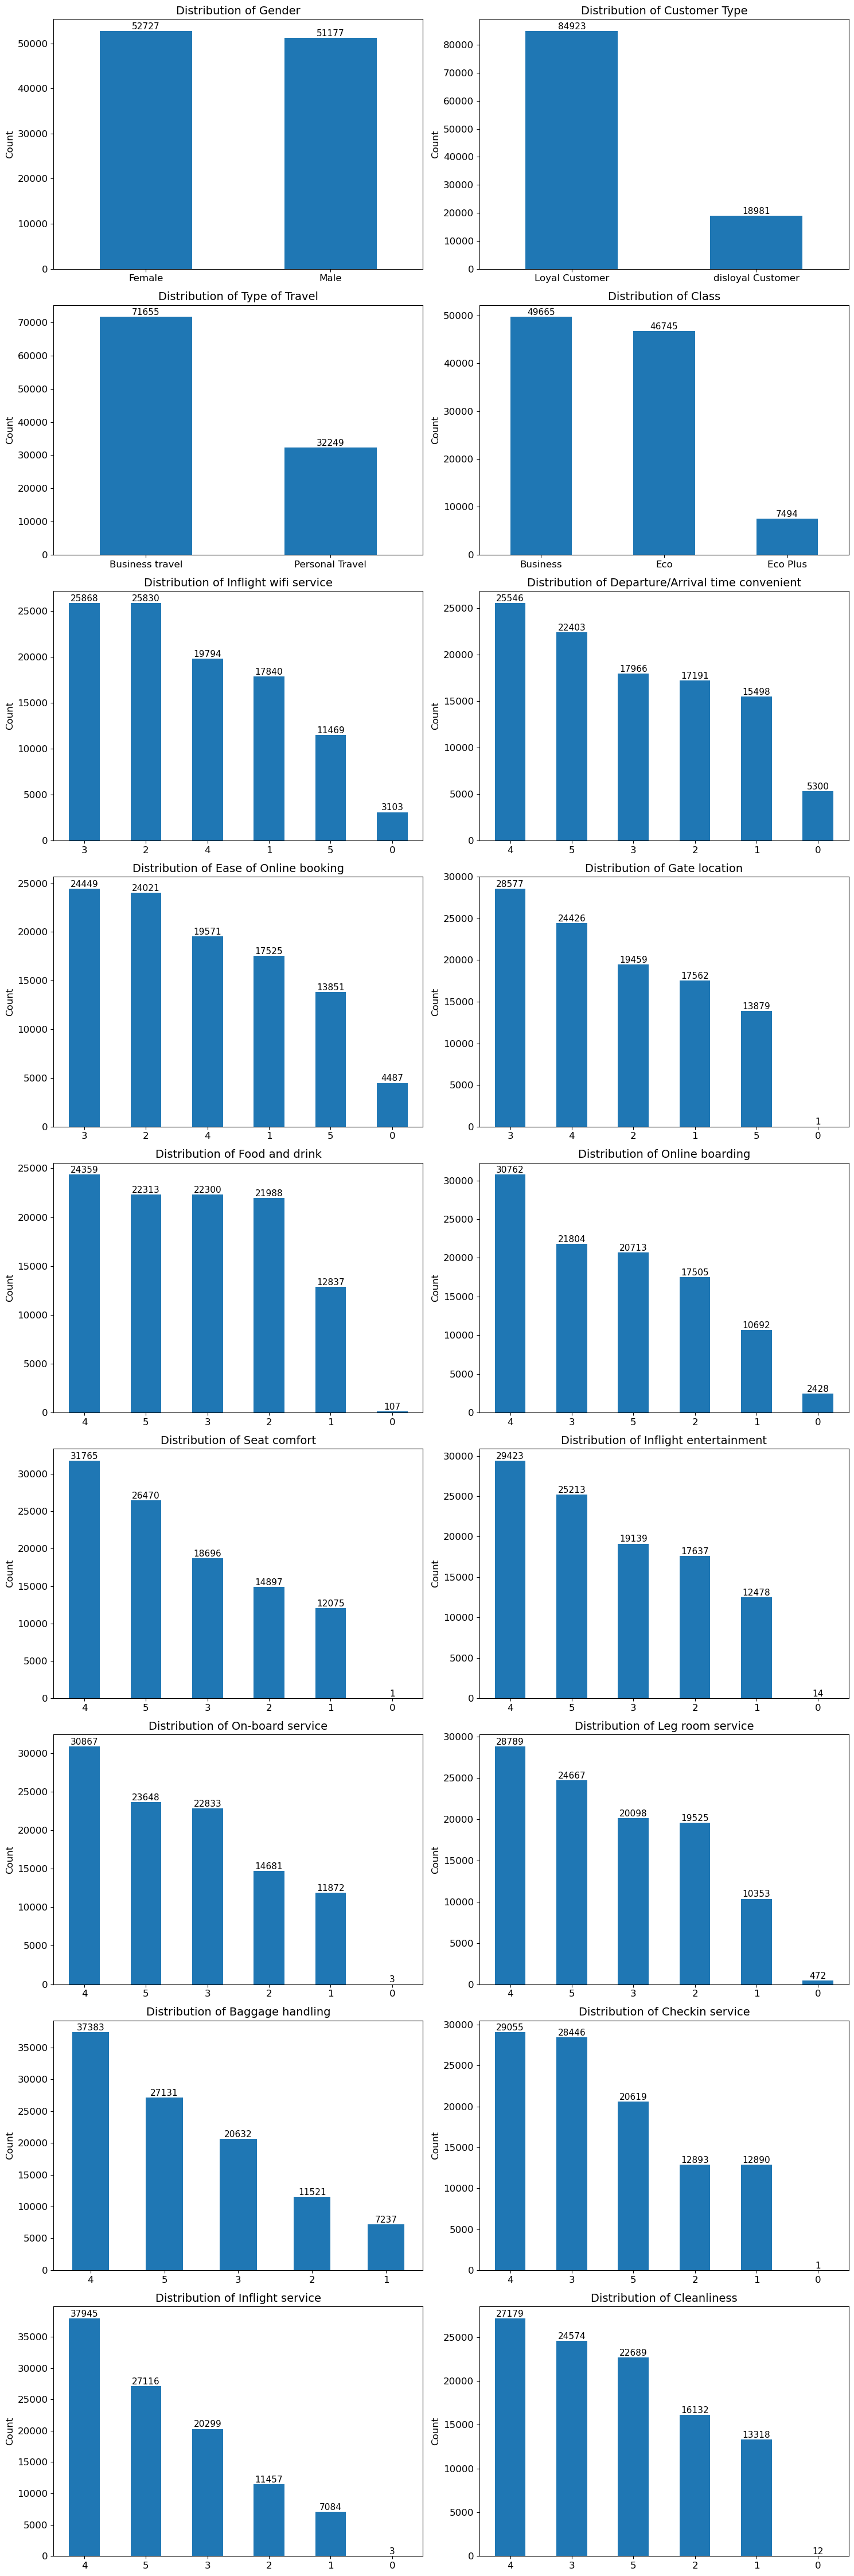

In [70]:
plot_categorical_variables(categorical_vars,df)

- Gender: The airline has a diverse mix of male and female passengers, Where 50% of people are male and female as well.
- Customer Type: The high number of 'Loyal' customers suggests that the airline has strong relationship with loyal customer as compare to disloyal customers.
- Type of Travel: Most passengers are traveling for 'Business' reasons, Where the 71655 people are choose for business purpose.
- Class: Business class is the most popular choice, indicating airline serves best services with affordable travel options.
- Inflight wifi service: Moderate ratings (around 3)suggest that improvement in the wifi service, which could boost customer satisfaction.
- Departure/Arrival time convenient: Most passengers satisfied with the departure and arrival times, which can be impactful for customers positive experiences.
- Ease of Online booking: Moderate ratings for online booking show that the booking system should be user-friendly.
- Food and drink: Positive feedback on food quality shows a good experience with dining service, which can improves passenger satisfaction.
- Online boarding: Positve ratings for online boarding indicating good and easy online boarding service.
- Seat comfort: Positive ratings for seat comfort contribute to passenger well-being during flights.
- Inflight entertainment: Customers are satisfied with wide entertainment options in the travel experience.
- On-board service: High ratings reflect the airline's commitment to excellent customer service, to loyalty among passengers.
- Baggage handling: Positive feedback reflects greatt baggage services.
- Checkin service: Favorable ratings indicate efficient and customer-friendly check-in processes.
- Inflight service: Positive ratings highlight the importance of great and valuable service from ariline staffs.
- Cleanliness: High ratings indicate a clean and hygienic environment for passenger's comfort throughout their journey.

In [76]:
numerical = df.select_dtypes(include = ['int64','float64'])
numerical.dtypes.index

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [77]:
numerical.corr(method = 'pearson')

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000063
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.036997
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021874


Text(0.5, 1.0, 'Pearson Correlation')

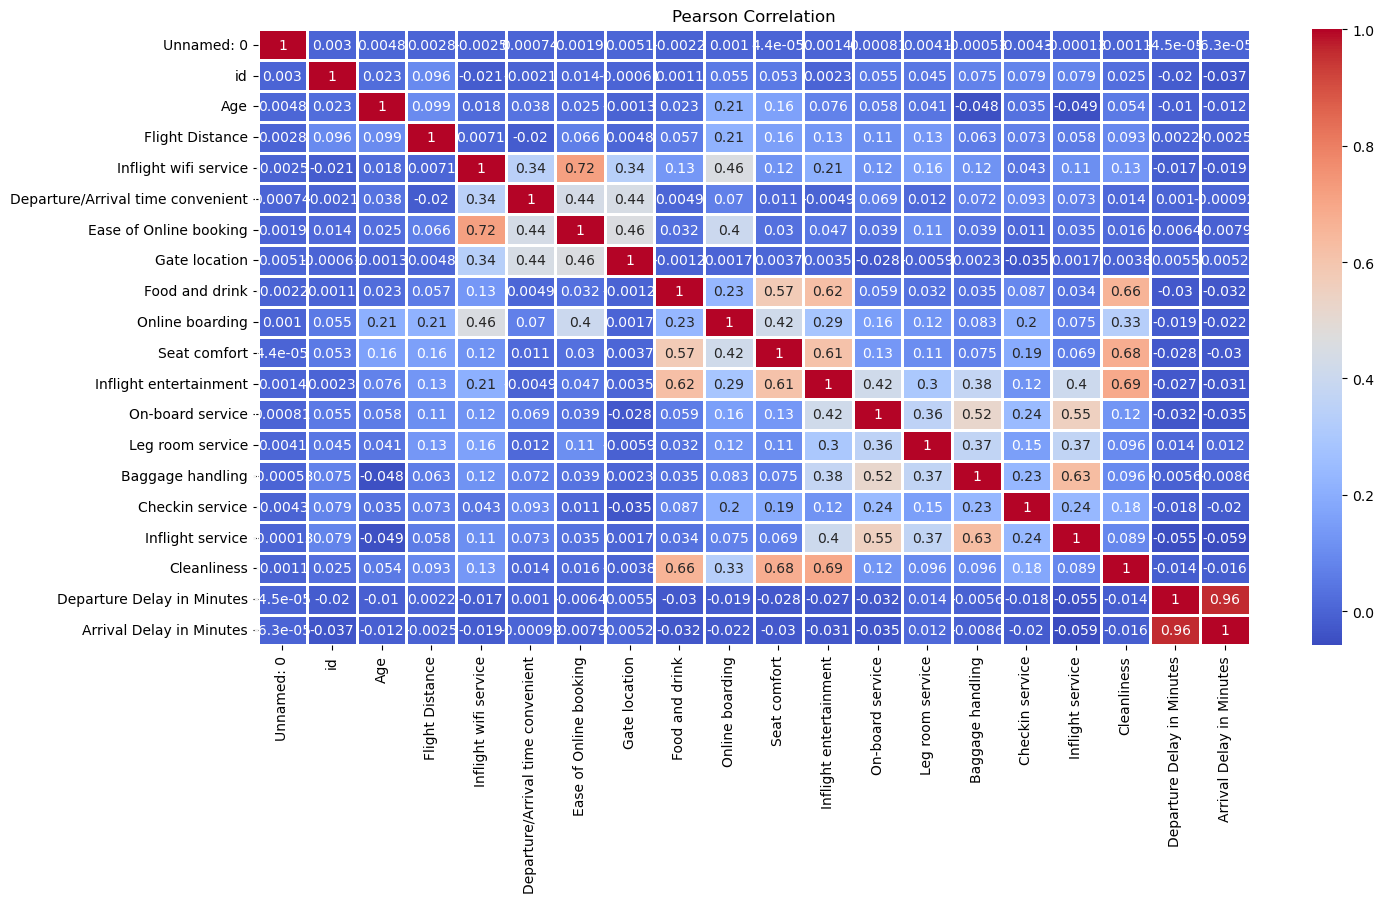

In [78]:
corr_pearson = numerical.corr(method='pearson')
plt.figure(figsize=(16, 8))
sns.heatmap(corr_pearson, cmap='coolwarm', cbar=True, annot=True, linewidths=1)
plt.title('Pearson Correlation')

- There are a strong positive correlation in between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', We can remove it they both can be impact as a multicolnearity.
- Where some of the feature are correlated which are 'Food and drink' & 'Cleanliness', 'Seat comfort' & 'Cleanliness', 'Seat comfort' & 'Cleanliness'and many more.

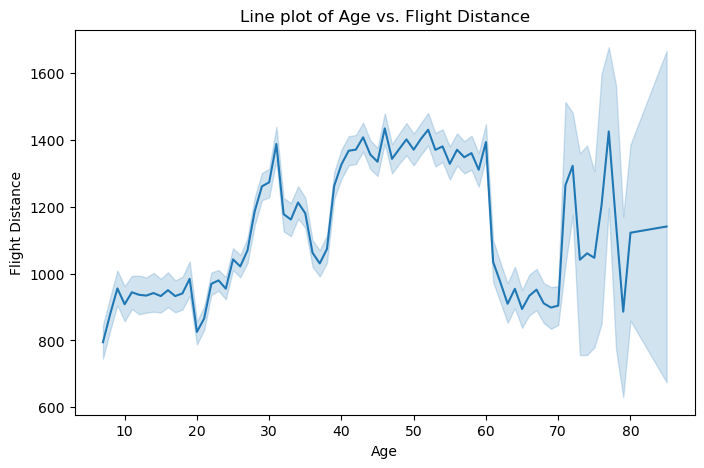

In [79]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='Flight Distance', data=df)
plt.title('Line plot of Age vs. Flight Distance')
plt.xlabel('Age')
plt.ylabel('Flight Distance')
plt.show()

- The line plot indicates that the majority of passengers falling between the ages of 30 and 50. and indicating that mostly people traveliing during their middle age and there average distance of the travelling are in between 1000 - 1400.
- Where aged people also choose the flight services for long distance, which indicates that airlines services can be good for long travel as well.

In [80]:
def flight_scatter_plot(df, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, data=df)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

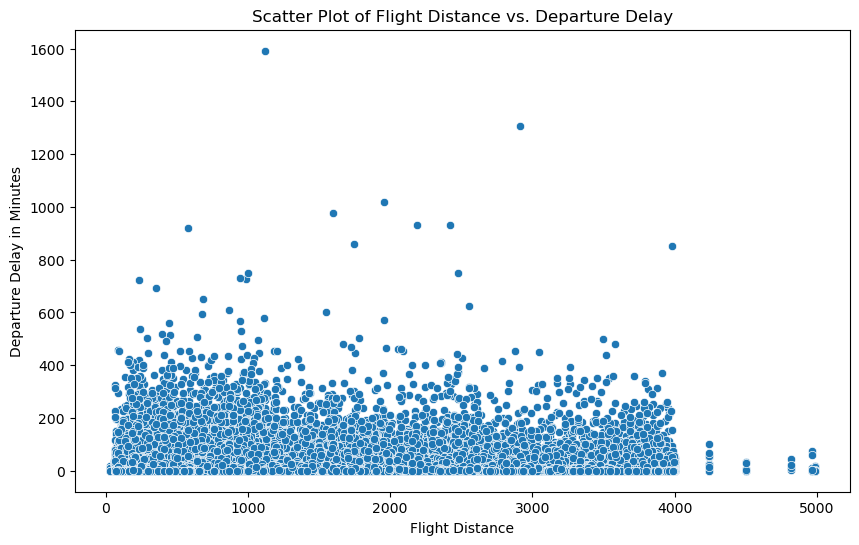

In [81]:
flight_scatter_plot(df, 'Flight Distance', 'Departure Delay in Minutes', 'Scatter Plot of Flight Distance vs. Departure Delay')

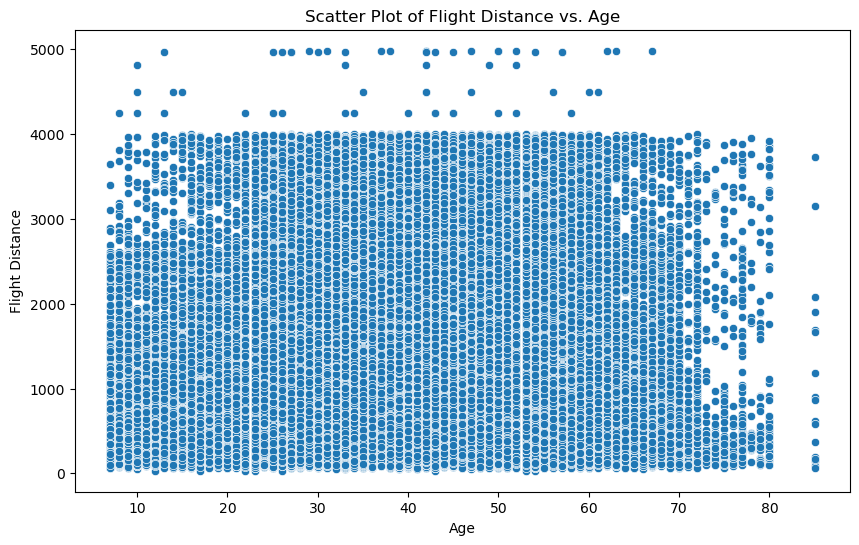

In [82]:
flight_scatter_plot(df,'Age','Flight Distance','Scatter Plot of Flight Distance vs. Age')

- The majority of data points cluster around shorter flight distances and minimal departure delays, there are notable outliers where longer flights coincide with significant departure delays.
- The scatter plot indicates the relationship between passenger age and flight distance. Interestingly, there does not appear to be a clear correlation between age and the distance traveled by flight.
- Both younger and older passengers are represented across a wide range of flight distances, indicating that age is not be a major factor in determining travel distance.
- The some of the people of the middle age take long distance flight, where the 80+ age people choose the flight on around normal distance.

In [85]:
def plot_bivariate(numerical_column, categorical_columns, plot_type='box'):
    num_cols = len(categorical_columns)
    
    if num_cols > 3:
        print("Error: You can only provide up to three categorical columns.")
        return
    
    fig, axes = plt.subplots(1, num_cols, figsize=(5*num_cols, 5))
    
    for i, cat_col in enumerate(categorical_columns):
        if plot_type == 'box':
            sns.boxplot(x=cat_col, y=numerical_column, data=df, ax=axes[i])
            axes[i].set_title(f'{numerical_column} vs {cat_col} (Box Plot)')
        elif plot_type == 'hist':
            sns.histplot(data=df, x=numerical_column, hue=cat_col, multiple="stack", ax=axes[i])
            axes[i].set_title(f'{numerical_column} distribution by {cat_col}')
            axes[i].set_xlim(left=0, right=100)            
        elif plot_type == 'bar':
            sns.countplot(data=df, x=numerical_column, hue=cat_col, ax=axes[i])
            axes[i].set_title(f'Count of {numerical_column} by {cat_col}')
        
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        
    plt.tight_layout()
    plt.show()

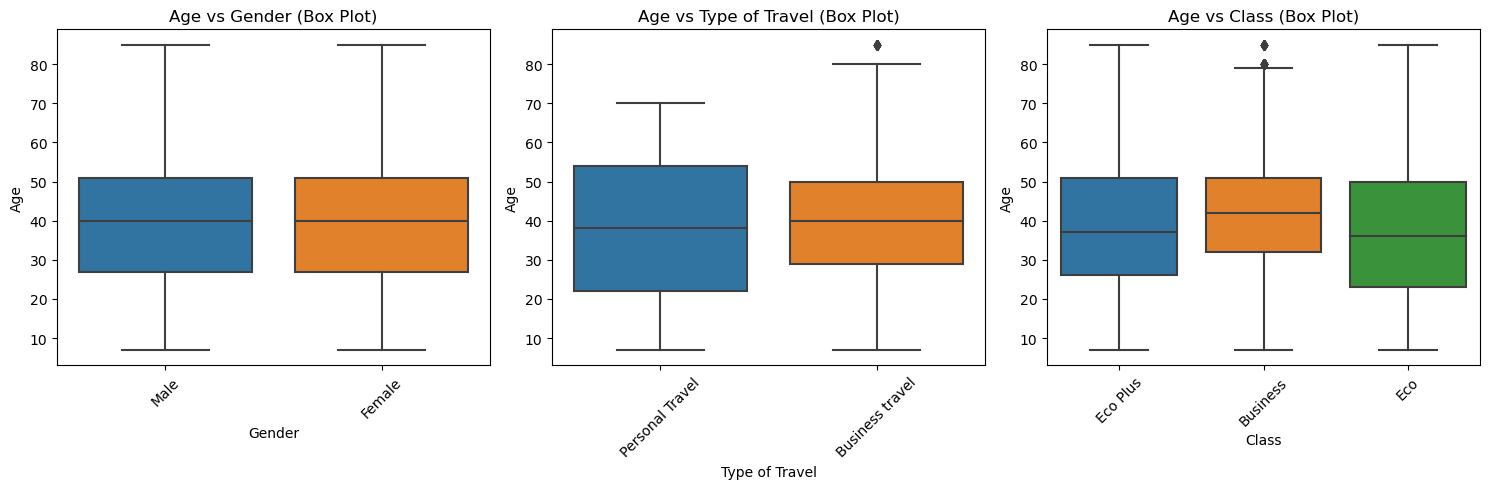

In [86]:
plot_bivariate('Age', ['Gender', 'Type of Travel', 'Class'], plot_type='box')

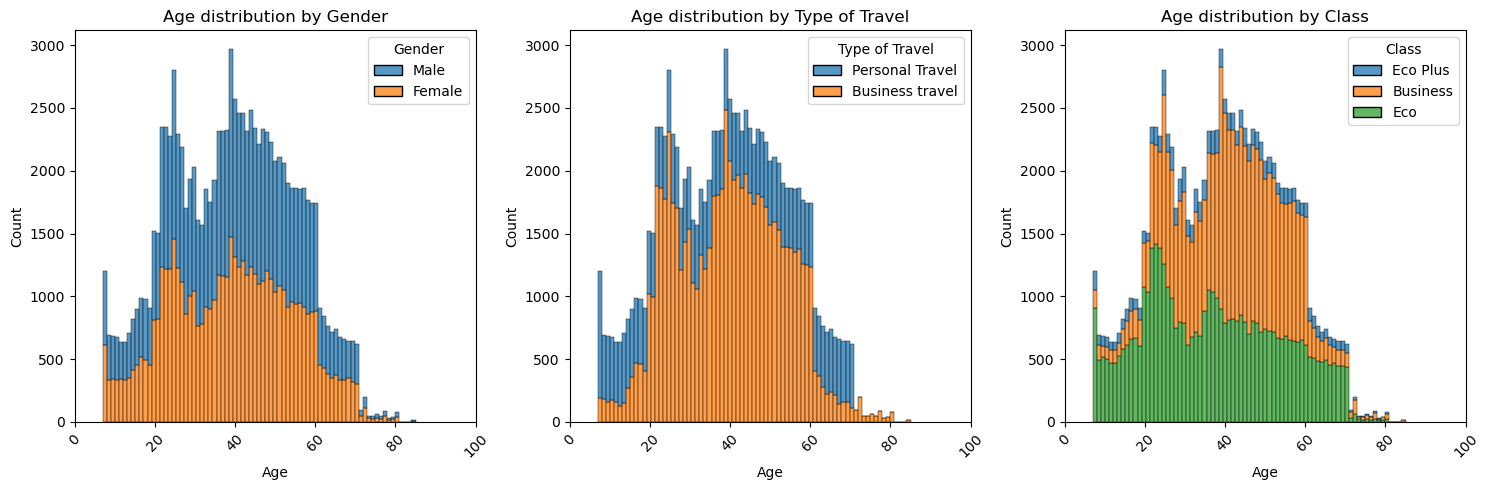

In [91]:
import warnings
warnings.filterwarnings("ignore")
plot_bivariate('Age', ['Gender', 'Type of Travel', 'Class'], plot_type='hist')

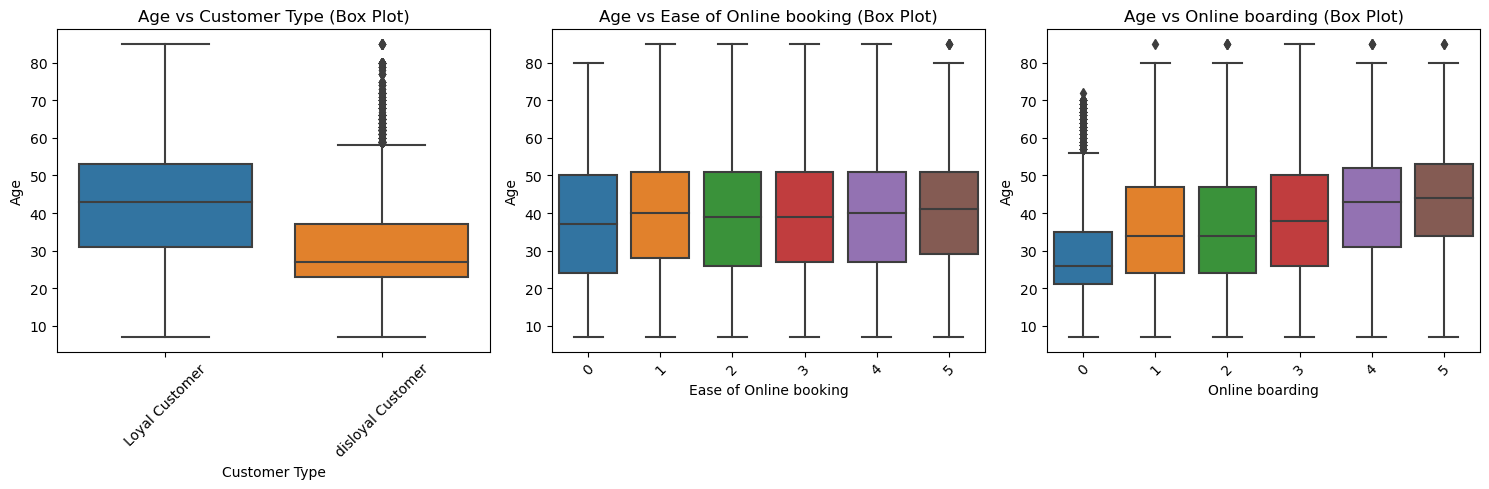

In [92]:
plot_bivariate('Age',['Customer Type','Ease of Online booking','Online boarding'])

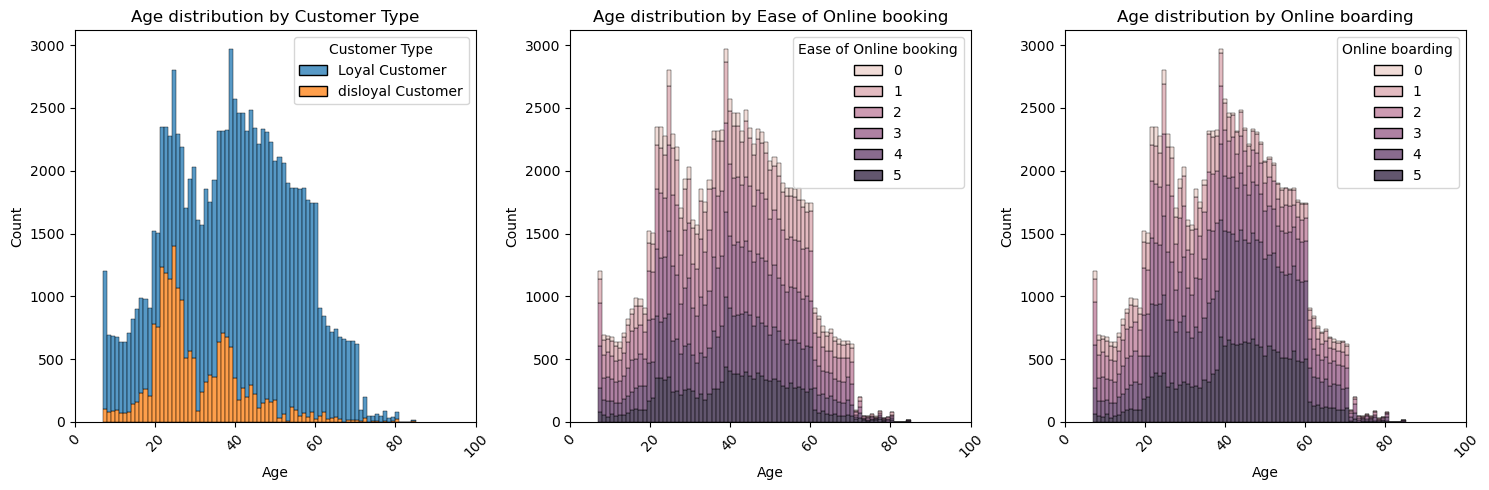

In [93]:
plot_bivariate('Age',['Customer Type','Ease of Online booking','Online boarding'],plot_type='hist')

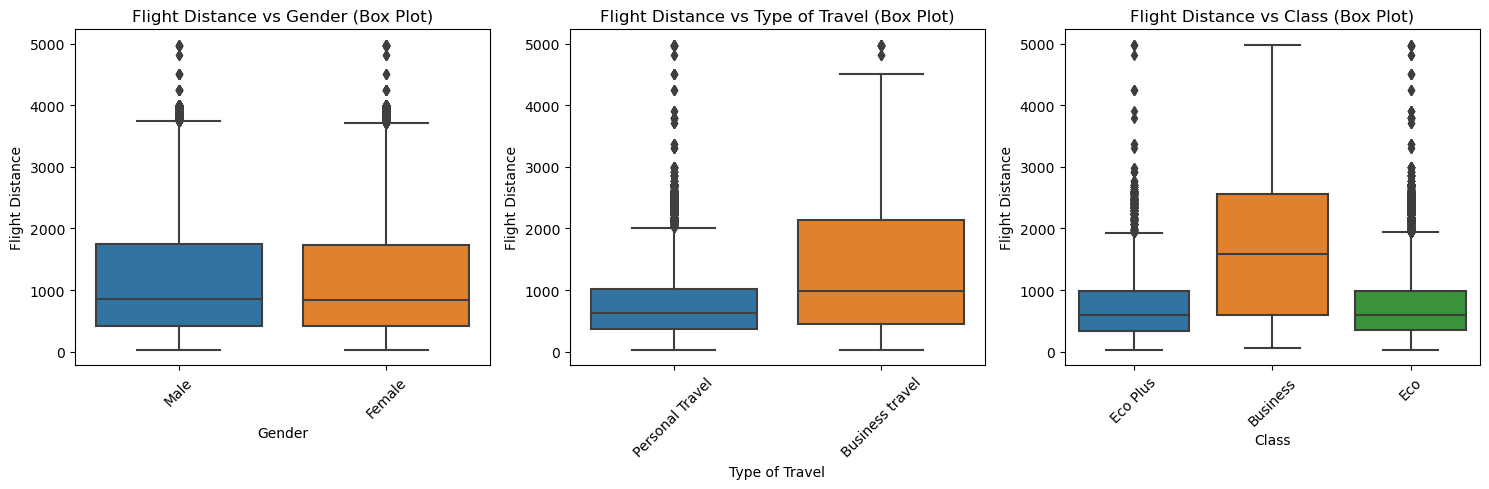

In [94]:
plot_bivariate('Flight Distance', ['Gender', 'Type of Travel', 'Class'], plot_type='box')

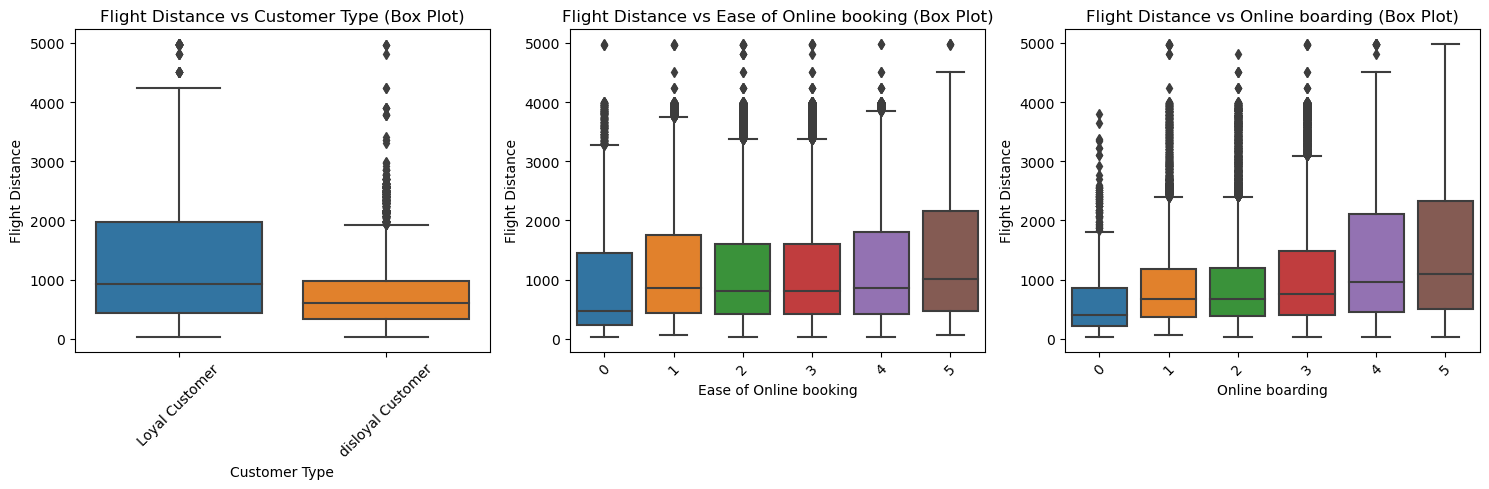

In [95]:
plot_bivariate('Flight Distance',['Customer Type','Ease of Online booking','Online boarding'])

In [96]:
def plot_bivariate_categorical(df, categorical_columns):

    num_cols = len(categorical_columns)
    if num_cols > 3:
        print("Error: You can only provide up to three categorical columns.")
        return
    
    # Create subplots
    fig, axes = plt.subplots(1, num_cols-1, figsize=(6*(num_cols-1), 5))
    
    # Plot each combination of categorical columns
    for i, cat_col in enumerate(categorical_columns[:-1]):  # Skip the last column
        sns.countplot(data=df, x=cat_col, hue=categorical_columns[-1], ax=axes[i], palette="Set3")
        axes[i].set_title(f'{cat_col} vs {categorical_columns[-1]}')
        axes[i].set_xlabel(cat_col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title=categorical_columns[-1])
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

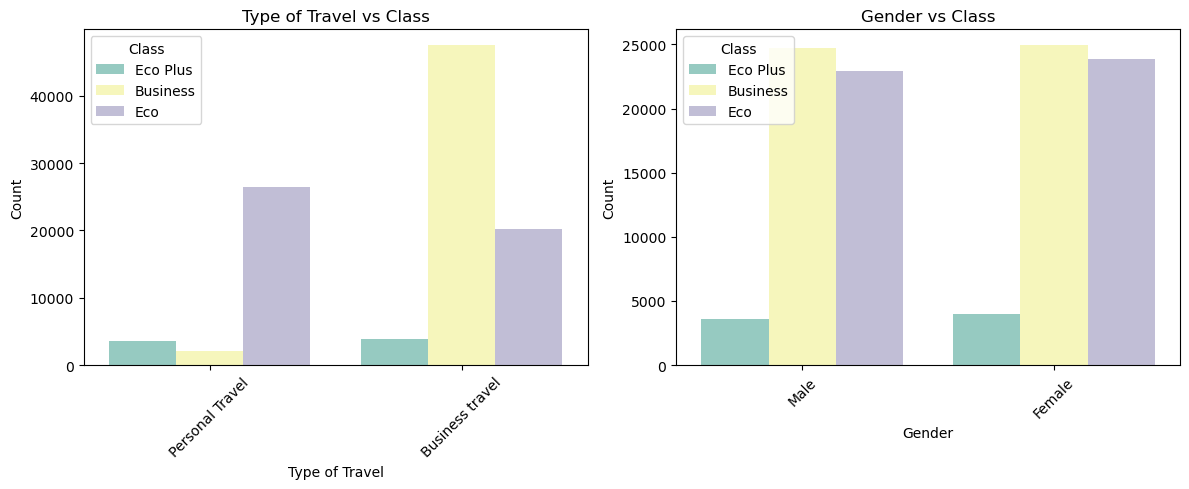

In [97]:
plot_bivariate_categorical(df, ['Type of Travel', 'Gender', 'Class'])

- The type of travel vs class ditribution indicates that majority of business traveller choose business class, where for the personal travel customer choose the economy.
- For class choices majoirty of males and female choose the business class and economy class. Which indicates the prices ranges and services both are best of this arilines.

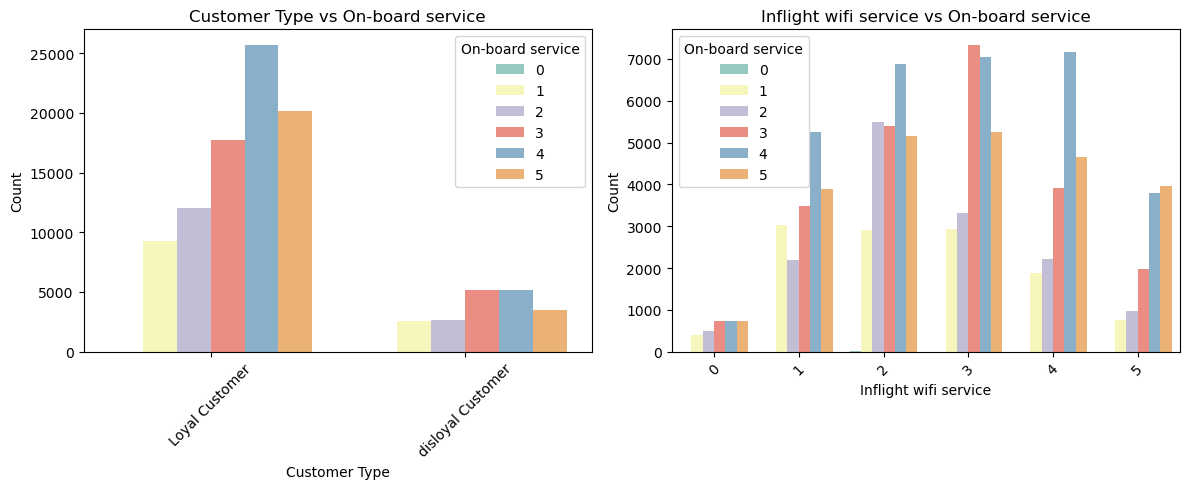

In [98]:
plot_bivariate_categorical(df, ['Customer Type', 'Inflight wifi service', 'On-board service'])

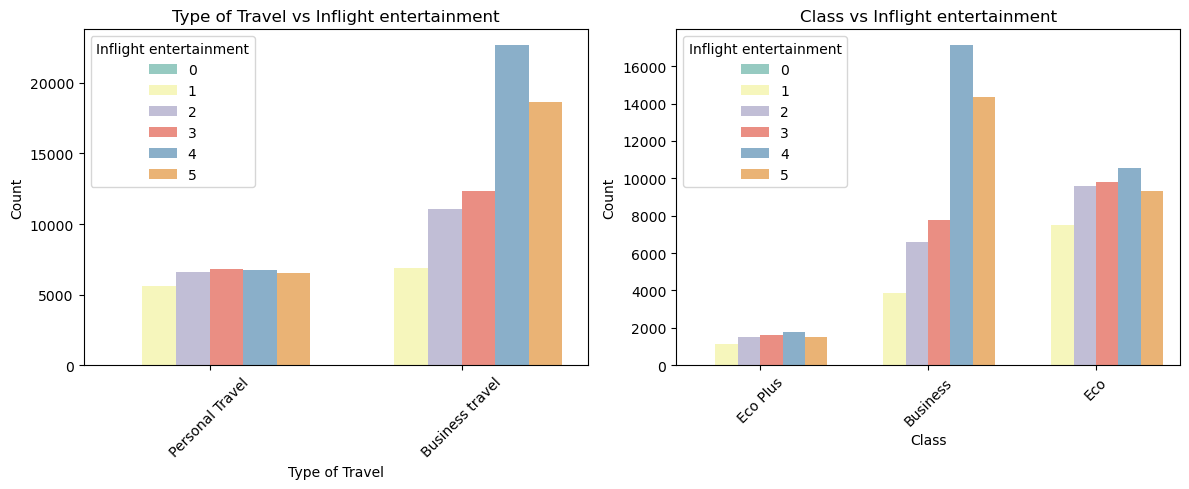

In [99]:
plot_bivariate_categorical(df, ['Type of Travel', 'Class', 'Inflight entertainment'])

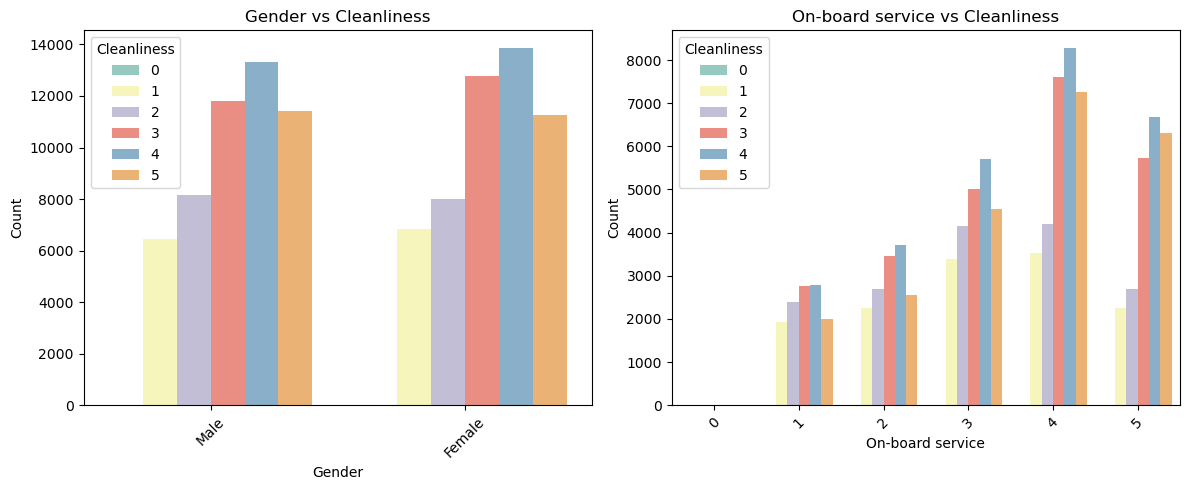

In [100]:
plot_bivariate_categorical(df, ['Gender', 'On-board service', 'Cleanliness'])

- The Customer type and legroom service indicates the, mostly loyal customers are satisified with the airline services as well as they satisified with the seatcomfort and legroom service.

In [116]:
df.select_dtypes(exclude=['int64','float64']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [115]:
X = df.drop(['satisfaction'],axis=1)
y = df['satisfaction']

In [117]:
# One-hot encoding for all features
X = pd.get_dummies(X,columns=['Gender','Customer Type','Type of Travel'],drop_first=True, dtype=int)

In [118]:
class_mapping = {
    "Eco": 0,
    "Eco Plus": 1,
    "Business": 2
}
X['Class'] = X['Class'].map(class_mapping)

In [120]:
X.head()

,Unnamed: 0,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,0,70172,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,1,0,1
1,1,5047,25,2,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,1,1,0
2,2,110028,26,2,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,0,0,0
3,3,24026,25,2,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,0,0
4,4,119299,61,2,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,0


In [122]:
X.shape

(103904, 24)

In [124]:
from sklearn.preprocessing import LabelEncoder
label_encorder = LabelEncoder()
y = label_encorder.fit_transform(y)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)

In [128]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [133]:
X_train_scaled.shape

(83123, 24)

In [134]:
from sklearn.linear_model import LogisticRegression

In [136]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [137]:
y_predlogreg = logreg.predict(X_train_scaled)

accuracy_train_log = accuracy_score(y_train,y_predlogreg)

In [171]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,f1_score,recall_score

In [139]:
# Calculate accuracy on training data
accuracy_test = accuracy_score(y_train, y_predlogreg)
print("Accuracy on training data:", accuracy_test)

Accuracy on training data: 0.8756300903480384


In [142]:
# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_train, y_predlogreg))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_predlogreg))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     47226
           1       0.87      0.84      0.85     35897

    accuracy                           0.88     83123
   macro avg       0.87      0.87      0.87     83123
weighted avg       0.88      0.88      0.88     83123


Confusion Matrix:
[[42761  4465]
 [ 5873 30024]]


In [145]:
cm = confusion_matrix(y_train, y_predlogreg)
cm

array([[42761,  4465],
       [ 5873, 30024]], dtype=int64)

In [147]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=logreg.classes_)

In [170]:
f1Score = f1_score(y_train,y_predlogreg)
f1Score

0.8531242008353934

In [172]:
recall = recall_score(y_train, y_predlogreg)
recall

0.8363930133437335

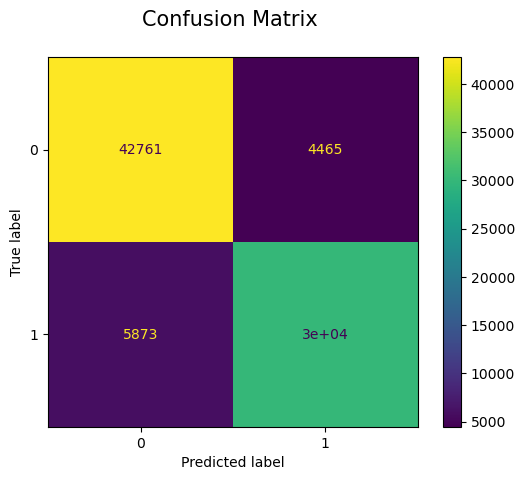

In [173]:
cm_display.plot()
plt.title("Confusion Matrix \n",fontsize=15)
plt.show()

Shape of y_test: (20781,)
Shape of y_pred_prob: (20781,)
ROC AUC: 0.9285163089131655


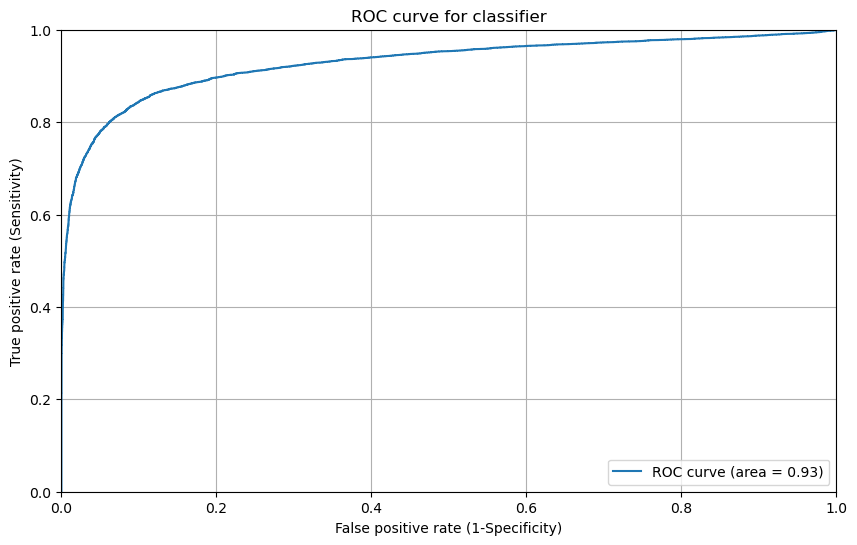

In [166]:
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Verify shapes of y_test and y_pred_prob
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred_prob: {y_pred_prob.shape}")

if len(y_test) != len(y_pred_prob):
    raise ValueError("The lengths of y_test and y_pred_prob do not match!")

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

*The logistic regression model achieved a ROC AUC of 0.93 and an F1-score of 0.85, with a recall of 0.85 on the test set. It produced an overall accuracy of 88% on the test set and 87.6% on the training data, showing good performance in distinguishing between the classes.*